In [3]:

from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

first we import necessary libraries

In [4]:
df=read_csv('hack.csv')

In [5]:
df

town  area  bedrooms   age   price
0   monroe township  2600         3  20.0  550000
1   monroe township  3000         4   NaN  565000
2   monroe township  3200         4  15.0  610000
3   monroe township  3600         5  16.0  680000
4   monroe township  4000         5  10.0  725000
5      west windsor  2600         4  18.0  585000
6      west windsor  2800         4  15.0  615000
7      west windsor  3300         3   8.0  650000
8      west windsor  3600         3   NaN  710000
9       robinsville  2600         2   8.0  575000
10      robinsville  2900         2   5.0  600000
11      robinsville  3100         4   6.0  620000
12      robinsville  3600         3   1.0  695000

Let us implement label encoder to handle non-numeric variables.

In [6]:
le=LabelEncoder()
df['town']=le.fit_transform(df['town'])

In [7]:
df

town  area  bedrooms   age   price
0      0  2600         3  20.0  550000
1      0  3000         4   NaN  565000
2      0  3200         4  15.0  610000
3      0  3600         5  16.0  680000
4      0  4000         5  10.0  725000
5      2  2600         4  18.0  585000
6      2  2800         4  15.0  615000
7      2  3300         3   8.0  650000
8      2  3600         3   NaN  710000
9      1  2600         2   8.0  575000
10     1  2900         2   5.0  600000
11     1  3100         4   6.0  620000
12     1  3600         3   1.0  695000

We encoded the categorical values of town column as:-
1.  monroe township   encoded as 0
2.  robinsville       encoded as 1
3.  west windsor      encoded as 2

Check for any missing values(NaN)

In [8]:
df.isnull().sum()

town        0
area        0
bedrooms    0
age         2
price       0
dtype: int64

since, our dataset  have 2 missing values, we can proceed further to eliminate them.

say, if we have missing values we can either drop them or fill them with mean/median.
1. syntax :-
2. df.dropna('column_name',inplace=True)



Fill NaN values in the column 'column_name' 
1. syntax :-
2. df.ffill(subset=['column_name'], inplace=True)

Here, we filled NaN with median value of age column
1. syntax :-
2. m=int(df.bedrooms.median())
3. df.bedrooms=df.bedrooms.fillna(m)

In [9]:
m=int(df.age.median())
df.age=df.age.fillna(m)

In [10]:
df

town  area  bedrooms   age   price
0      0  2600         3  20.0  550000
1      0  3000         4  10.0  565000
2      0  3200         4  15.0  610000
3      0  3600         5  16.0  680000
4      0  4000         5  10.0  725000
5      2  2600         4  18.0  585000
6      2  2800         4  15.0  615000
7      2  3300         3   8.0  650000
8      2  3600         3  10.0  710000
9      1  2600         2   8.0  575000
10     1  2900         2   5.0  600000
11     1  3100         4   6.0  620000
12     1  3600         3   1.0  695000

Now, assign input (x) and target variables (y)

In [11]:
x=df.iloc[0:, :-1]    #all columns except last column
x

town  area  bedrooms   age
0      0  2600         3  20.0
1      0  3000         4  10.0
2      0  3200         4  15.0
3      0  3600         5  16.0
4      0  4000         5  10.0
5      2  2600         4  18.0
6      2  2800         4  15.0
7      2  3300         3   8.0
8      2  3600         3  10.0
9      1  2600         2   8.0
10     1  2900         2   5.0
11     1  3100         4   6.0
12     1  3600         3   1.0

our target is to predict price . so y='price' column.

In [12]:
y=df[['price']] 
y

price
0   550000
1   565000
2   610000
3   680000
4   725000
5   585000
6   615000
7   650000
8   710000
9   575000
10  600000
11  620000
12  695000

Let's visualize prices with columns- area, bedrooms & age

Text(0, 0.5, 'Price')

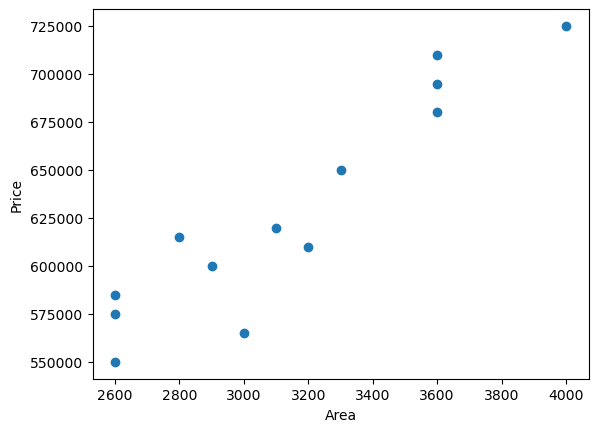

In [13]:
scatter(df[['area']],df[['price']])
xlabel('Area')
ylabel('Price')

Text(0, 0.5, 'Price')

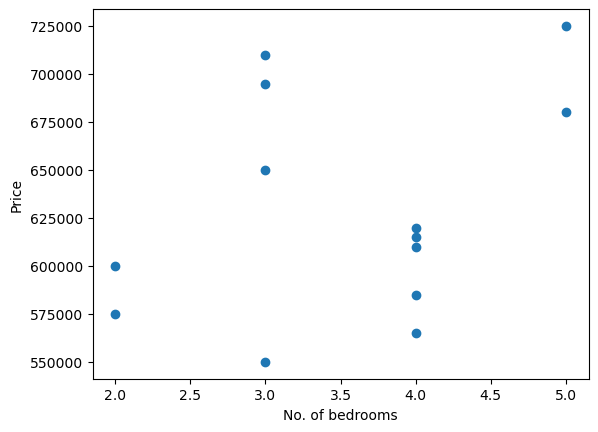

In [14]:
scatter(df[['bedrooms']],df[['price']])
xlabel('No. of bedrooms')
ylabel('Price')

Text(0, 0.5, 'Price')

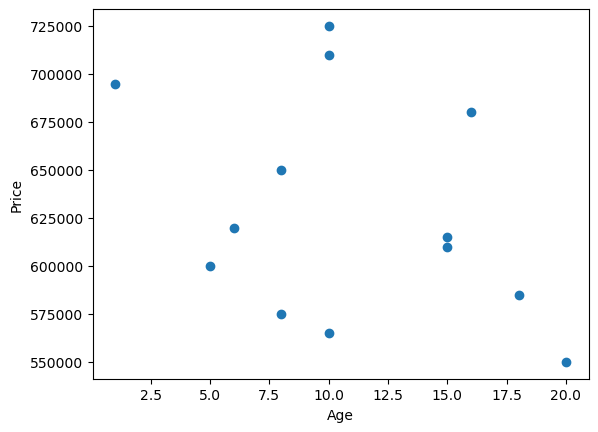

In [15]:
scatter(df[['age']],df[['price']])
xlabel('Age')
ylabel('Price')

Draw pairplot to compare all column's attributes in a single chart

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

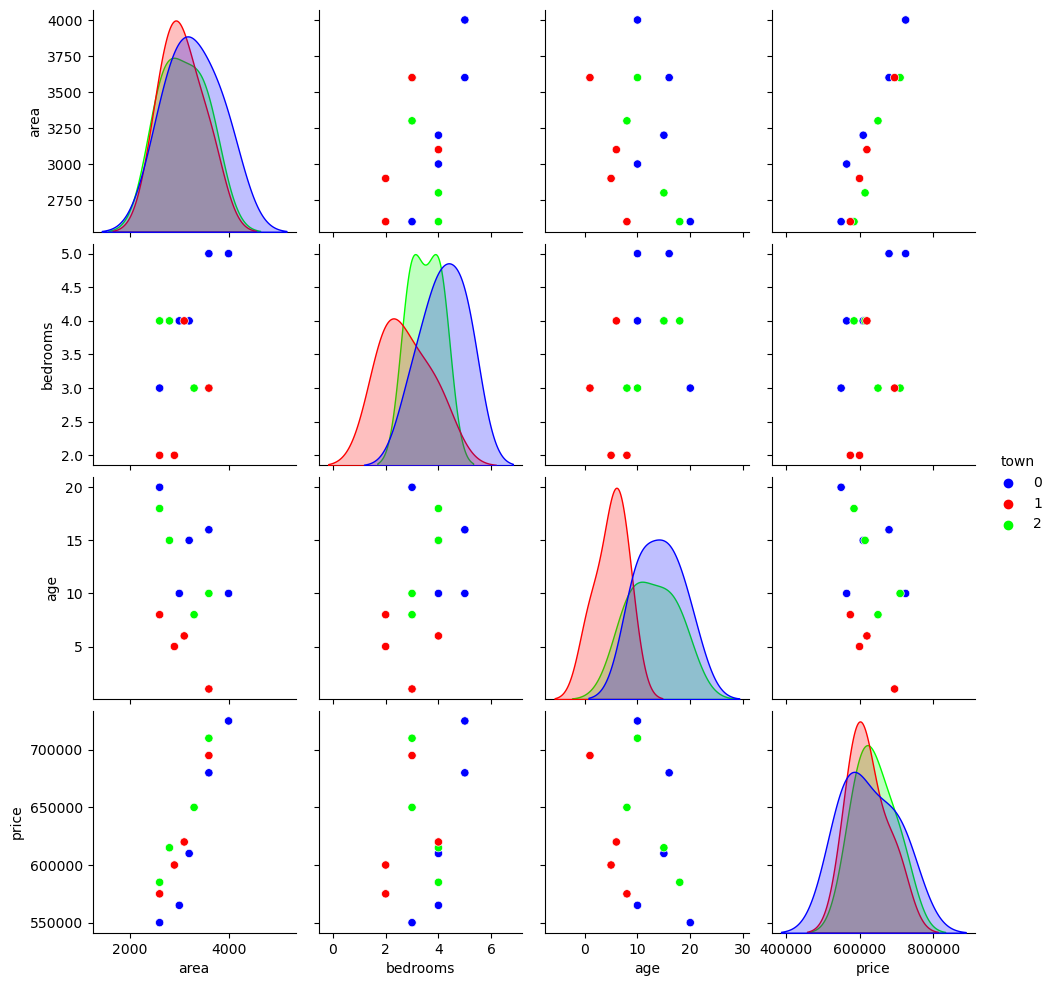

In [16]:
pairplot(data=df,hue='town',palette='brg')

Robinsville(1) has the costliest houses.

--------------------------------------------------------

Now, we will split the data into training and testing sets.
1. syntax:-
2. from sklearn.model_selection import train_test_split
3. x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0,random_state=0)

 SPLIT data into 20% for testing & 80% for training.

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=243)

Now, let's implement our very basic ML Regression algo- Simple Linear Regression(here, Multiple Linear Regression).
1. syntax :-
2. from sklearn.linear_model import LinearRegression
3. r=LinearRegression()

In [18]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()

Now, fit the train data into our model.
1. syntax :-    
2. r.fit(x_train,y_train)

In [19]:
r.fit(x_train,y_train)

LinearRegression()

parameters fine tuned to increase accuracy of our model

In [20]:
r.score(x_train,y_train)

0.9393374033400708

In [21]:
r.score(x_test,y_test)

0.994275555099078

yes ! our model is performing well on the training(seen) data as well as in testing data(unseen).

-------------------PREDICTIONS-----------------------

In [22]:
m=r.predict([[1,3500,2,8]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
print('Price of a house located in robinsville having area of 3500 sq.m , 2 bedrooms of age 2 years =  Rs'  ,m)

Price of a house located in robinsville having area of 3500 sq.m , 2 bedrooms of age 2 years =  Rs [[684234.63704687]]


so,Price of a house located in robinsville having area of 3500 sq.m , 2 bedrooms of age 2 years =  Rs 684.2 k.

In [24]:
n=r.predict([[0,4500,5,18]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
n

array([[796658.74839992]])

In [26]:
p=r.predict([[2,3800,3,10]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
p

array([[744978.23246006]])

In [28]:
df

town  area  bedrooms   age   price
0      0  2600         3  20.0  550000
1      0  3000         4  10.0  565000
2      0  3200         4  15.0  610000
3      0  3600         5  16.0  680000
4      0  4000         5  10.0  725000
5      2  2600         4  18.0  585000
6      2  2800         4  15.0  615000
7      2  3300         3   8.0  650000
8      2  3600         3  10.0  710000
9      1  2600         2   8.0  575000
10     1  2900         2   5.0  600000
11     1  3100         4   6.0  620000
12     1  3600         3   1.0  695000

FEATURE SELECTION USING LASSO REGRESSION.

In [29]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.1)
l.fit(x,y)

Lasso(alpha=0.1)

In [30]:
names=x.columns
names

Index(['town', 'area', 'bedrooms', 'age'], dtype='object')

In [31]:
rng=range(len(names))

In [32]:
l.coef_

array([20277.84708735,   134.44136019, -4414.47870797,   964.62574245])

Text(0, 0.5, 'LASSO coeff.')

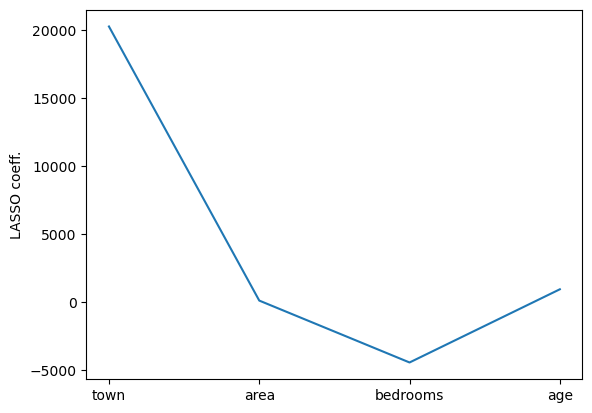

In [33]:
plot(rng,l.coef_)
xticks(rng,names)
ylabel('LASSO coeff.')

Order of importance of features:- town > age > area > bedrooms.

Simply speaking, town(location) & age of houses are most influencial features

so, this is my project on house price predictions.




----------------------- Thank you! ---------------------------------